<a href="https://colab.research.google.com/github/ritikjain00/Abalone-Dataset/blob/master/Abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Abstract:**
To predict the age of abalone from physical measurements

**Dataset Information:**
Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [2]:
from google.colab import files
file = files.upload()

Saving abalone.csv to abalone (2).csv


In [4]:
import io
data = pd.read_csv(io.BytesIO(file['abalone.csv']))

In [5]:
print('Shape of data: ',data.shape)
print('\n')
print(data.head(5))

Shape of data:  (4177, 9)


  Sex  Length  Diameter  ...  Viscera weight  Shell weight  Rings
0   M   0.455     0.365  ...          0.1010         0.150     15
1   M   0.350     0.265  ...          0.0485         0.070      7
2   F   0.530     0.420  ...          0.1415         0.210      9
3   M   0.440     0.365  ...          0.1140         0.155     10
4   I   0.330     0.255  ...          0.0395         0.055      7

[5 rows x 9 columns]


In [6]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


The count of each column is same so we can say that there is no missing values.But we must ncheck it again

In [7]:
#checking if any missing values again
print(data.isnull().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None



As per data description:
  **Age = number of rings + 1.5**

In [9]:
data['Age'] = data['Rings'] + 1.5
print(data.shape)

(4177, 10)


In [10]:
data.groupby('Sex')['Rings'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1307.0,11.129304,3.104256,5.0,9.0,10.0,12.0,29.0
I,1342.0,7.890462,2.511554,1.0,6.0,8.0,9.0,21.0
M,1528.0,10.705497,3.026349,3.0,9.0,10.0,12.0,27.0


In [11]:
data.groupby('Sex').mean()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
Sex,,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304,12.629304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497,12.205497


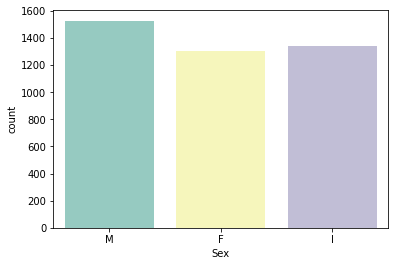

In [12]:
sns.countplot(x = 'Sex', data = data, palette="Set3")

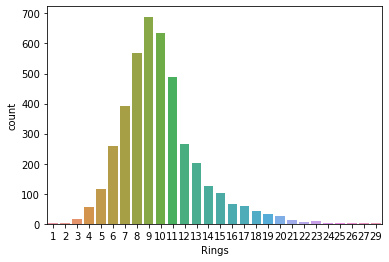

In [13]:
sns.countplot(data.Rings)

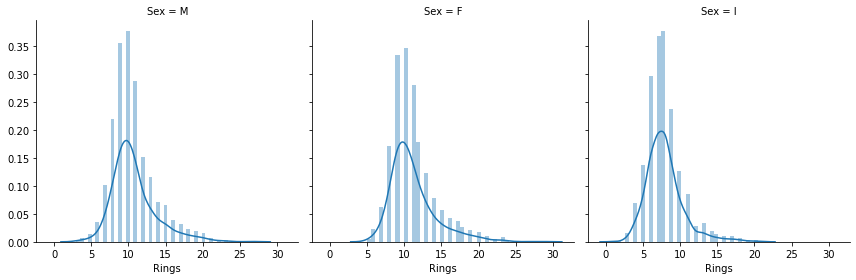

In [14]:
plot = sns.FacetGrid(data = data, col = 'Sex', height=4)
plot = plot.map(sns.distplot, 'Rings')

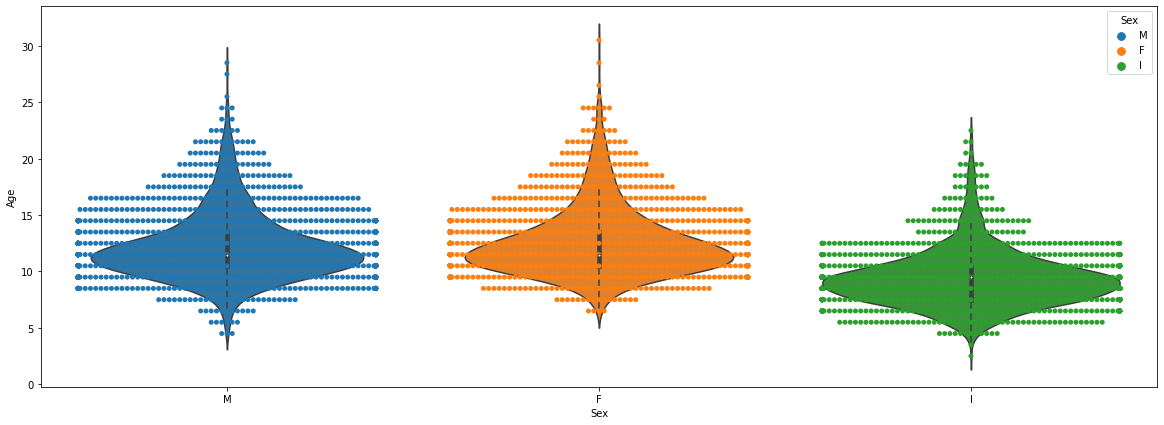

In [15]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Age', data = data, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Age', data = data)

In [16]:

#separating data into numerical and categorical columns
cate_data = data.select_dtypes(include='object').columns.tolist()
num_data = data.select_dtypes(exclude='object').columns.tolist()
print('Categorical Data: ',cate_data)
print('Numerical Data: ',num_data)

Categorical Data:  ['Sex']
Numerical Data:  ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings', 'Age']


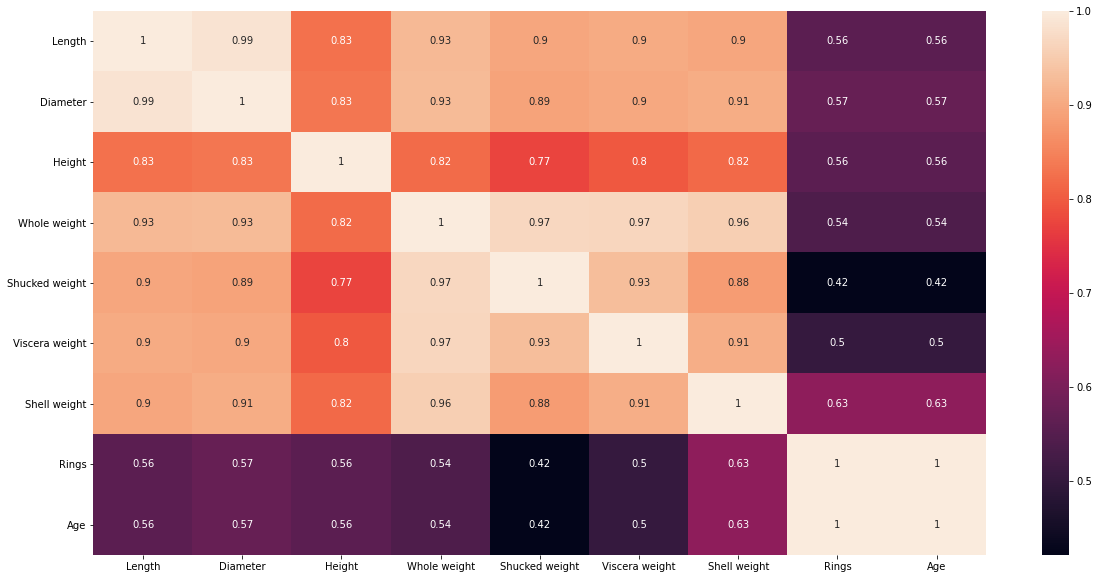

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(data[num_data].corr(), annot=True)

In [18]:
#encoding the categorical columns
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [19]:
X = data.drop(['Rings', 'Age'], axis = 1)
y = data[['Rings']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 20)

Evaluating performance of different model and tuning the desired model


In [20]:
#spot check which algorithm is good
models=[]
models.append(('LR',LinearRegression()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('SVR',SVR(gamma='auto')))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('RFR',RandomForestRegressor()))
models.append(('RidgeR',Ridge()))

In [21]:
#evaluate each model
results=[]
names=[]
scoring = ['neg_mean_squared_error', 'r2']
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=10)
    cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('%s:   ,MSE:%f    ,R2:%f' % (name,cv_results['test_neg_mean_squared_error'].mean(),cv_results['test_r2'].mean()))
    

LR:   ,MSE:-4.786395    ,R2:0.518048
KNN:   ,MSE:-4.914838    ,R2:0.504711
SVR:   ,MSE:-5.776825    ,R2:0.417794
DTR:   ,MSE:-8.643072    ,R2:0.130084
RFR:   ,MSE:-4.487350    ,R2:0.548055
RidgeR:   ,MSE:-4.662814    ,R2:0.530186



Linear Regression, Ridge and Random Forest Regressor models have a high R2_score.

Selecting Random Forest Regressor for making predictions

In [22]:
  def train_predict_plot(model, plot_train = False):
    """
    - Fits the model to training set
    - Makes predictions on Testing set
    - Prints Evaluation Metrics
    - Plots predictions vs True values"""
   
    
    model.fit(X_train, y_train)

    y_pred_on_train = model.predict(X_train)
    y_pred = model.predict(X_test)

    print('Mean Absolute Error -', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error -', mean_squared_error(y_test, y_pred))
    print('R2 Score - ', r2_score(y_test, y_pred))
    
    if plot_train:
        plt.scatter(y_train, y_pred_on_train, label = 'Training Data')
    plt.scatter(y_test, y_pred, label = 'Testing Data')
    plt.xlabel('True')
    plt.ylabel('Predicted')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.title('{}\n Predicted vs Actual'.format(str(type(model)).replace('.', ' ').replace('>', ' ').replace("'", ' ').split(' ')[-3]))
    plt.legend()
    plt.show()

Mean Absolute Error - 1.5812345042985343
Mean Squared Error - 5.256514044706175
R2 Score -  0.5414997813971327


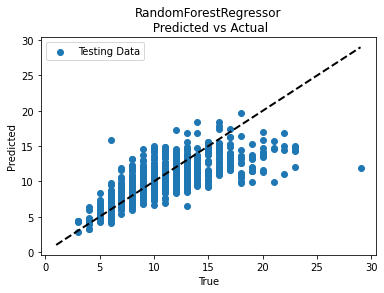

In [23]:
regressor = RandomForestRegressor(n_estimators=200, max_depth=8, random_state=10)
train_predict_plot(regressor)

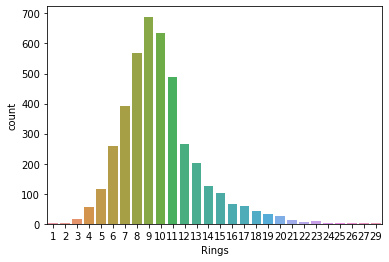

In [24]:
sns.countplot(data.Rings)

Data corresponding to Abalones of ages less than 3 and more than 24 is comparitively very low. Resampling methods can be used to duplicate the data.

In [25]:
# Dividing the data into majority and minority cases
data_temp = data[data['Rings'] <= 23]
data_majority = data_temp[3 <= data['Rings']]

data_minority_1 = data[data['Rings'] <= 2]
data_minority_2 = data[data['Rings'] >= 24]

data_minority = pd.concat([data_minority_1, data_minority_2])

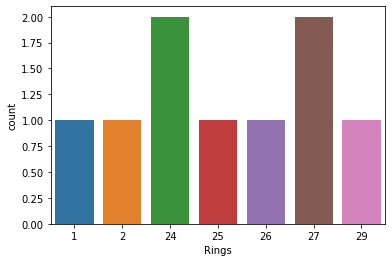

In [26]:
sns.countplot(data_minority.Rings)
#As seen Only one sample of each age is available for the model to train on. Now resampling the minority data.

In [27]:
from sklearn.utils import resample


data_minority_upsampled = resample(data_minority, replace=True, n_samples=1000, random_state=42)
data_majority_undersampled = resample(data_majority, replace=False, n_samples=100, random_state=42)

data_upsampled = pd.concat([data_majority, data_minority_upsampled])

In [28]:
X = data_upsampled.drop(['Rings', 'Age'], axis = 1)
y = data_upsampled[['Rings']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 10)

Mean Absolute Error - 1.3211401341438491
Mean Squared Error - 4.246035329086787
R2 Score -  0.9080831327768218


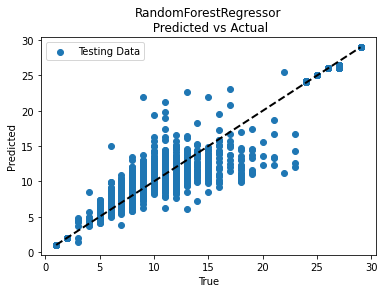

In [29]:
regressor = RandomForestRegressor(n_estimators=200, max_depth=8, random_state=10)
train_predict_plot(regressor)


There is a significant improvement in predicting these minority classes. Also the R2 Score is boosted by upsampling the minority data.